Q1: K-Fold Cross Validation for Multiple Linear Regression (Least Square Error Fit).
Download the dataset regarding USA House Price Prediction from the following link:
https://drive.google.com/file/d/1O_NwpJT-8xGfU_-3llUl2sgPu0xllOrX/view?usp=sharing
Load the dataset and Implement 5- fold cross validation for multiple linear regression
(using least square error fit).

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/USA_Housing.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


<Axes: >

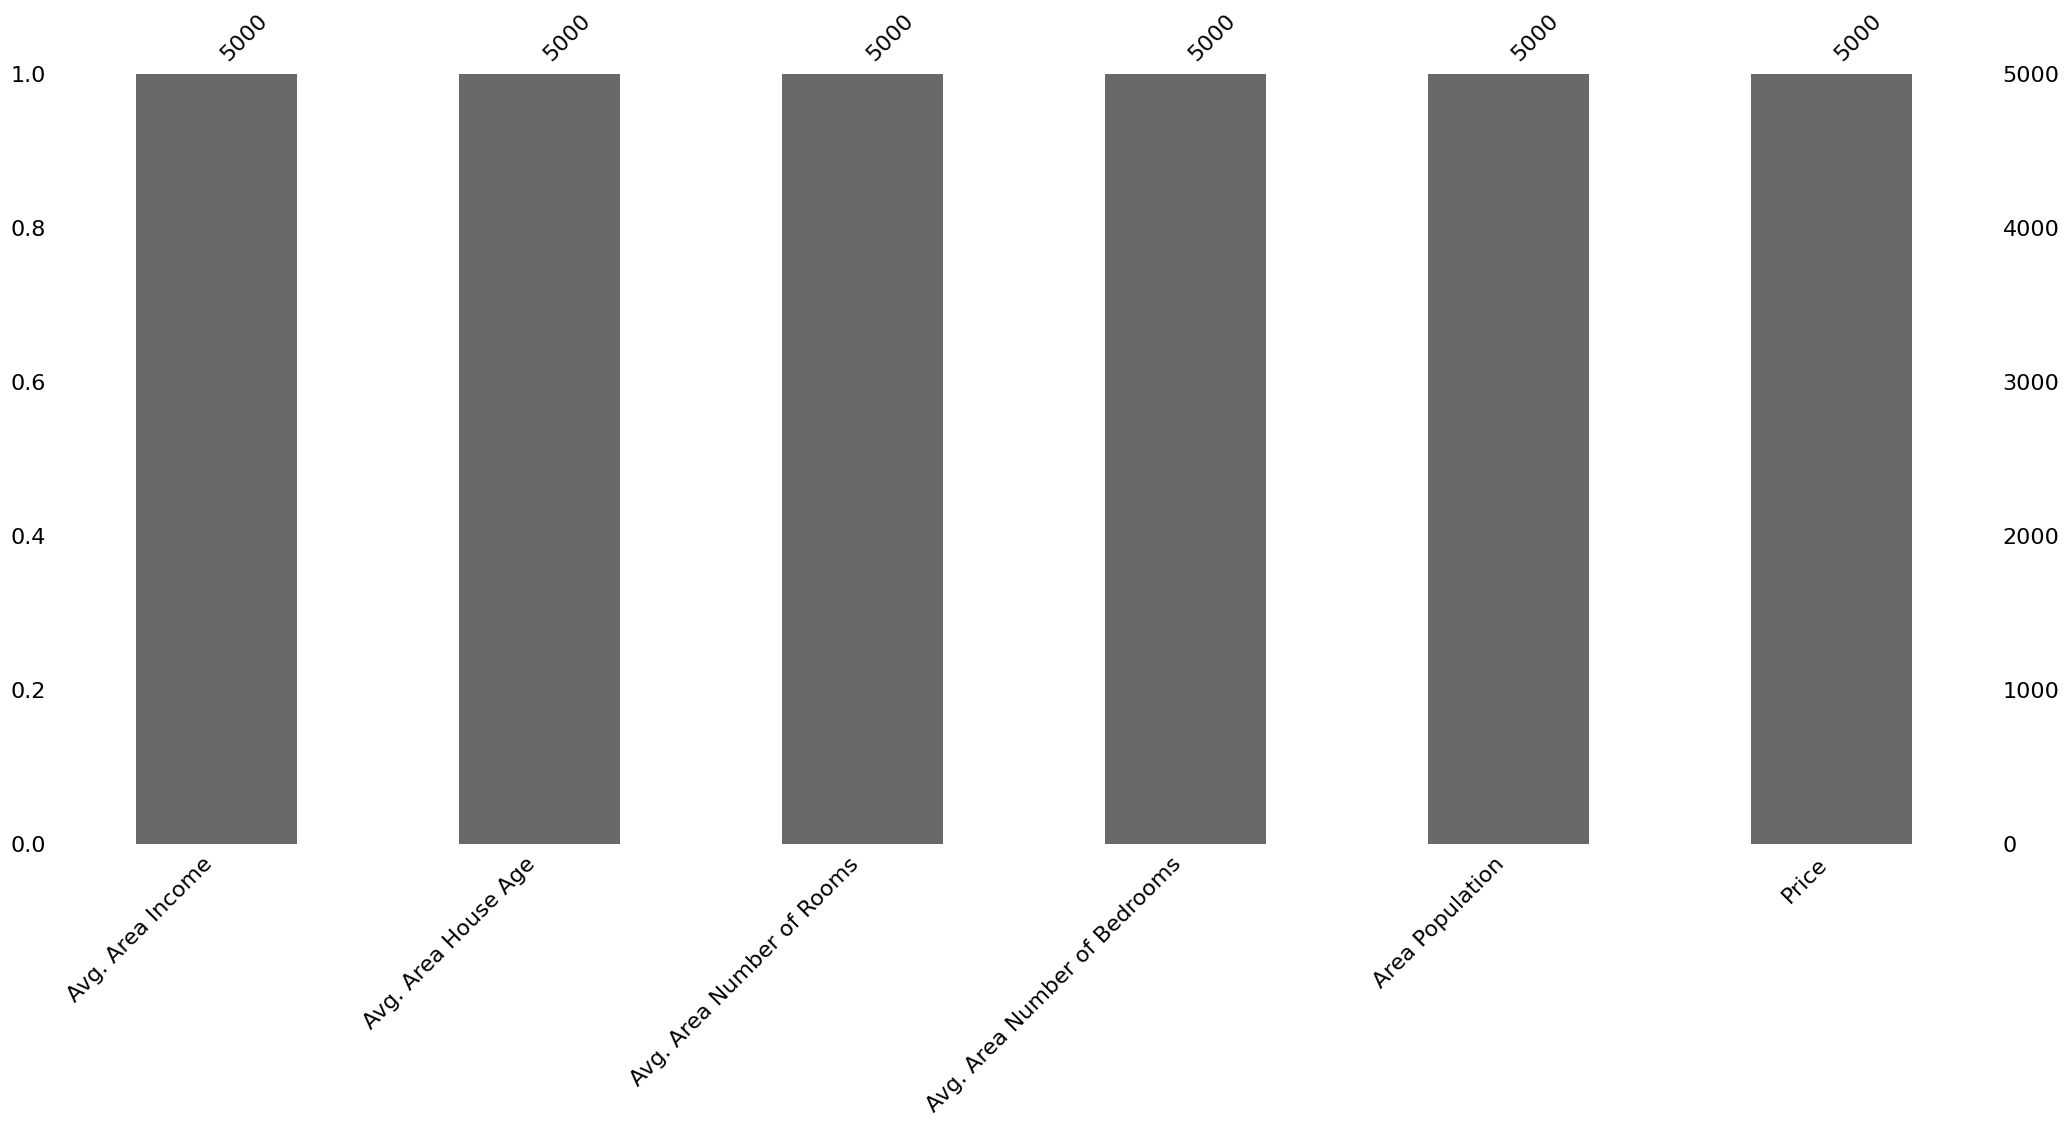

In [ ]:
import missingno as ms
ms.bar(df)

<Axes: >

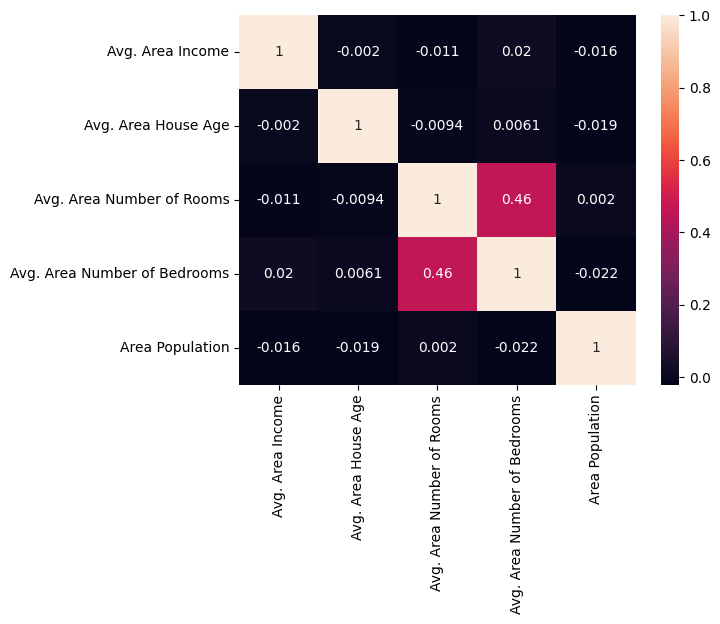

In [ ]:
import seaborn as sns
sns.heatmap(df.iloc[:,0:5].corr(),annot=True)

In [ ]:
import numpy as np
X=df.iloc[:,0:5]
Y=df.iloc[:,5]
Y=np.array(Y)
Y=Y.reshape(-1,1)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled= np.insert(X_scaled, 0, values=1, axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)

In [ ]:
A=X_train.T.dot(X_train)
B=np.linalg.inv(A)
C=B.dot(X_train.T)
beta=C.dot(y_train)
print(beta)

[[1231278.63687691]
 [ 230464.52520478]
 [ 164159.19982569]
 [ 120514.71328324]
 [   2913.62424674]
 [ 151019.35865134]]


In [ ]:
y_predict=X_test.dot(beta)
print(y_predict)

[[1308536.13611172]
 [1237122.72747115]
 [1243835.6280953 ]
 ...
 [1457119.79300222]
 [1483428.9529654 ]
 [1047510.59741982]]


In [ ]:
error=y_test-y_predict
square_error=np.power(error,2)
sum_square_error=np.sum(square_error)
mean_square_error=sum_square_error/len(y_predict)
print(mean_square_error)

10070917109.152678


In [ ]:
rms_error=np.sqrt(mean_square_error)
print(rms_error)

100353.95911050384


In [ ]:
y_mean=np.mean(y_test)
total_variance=np.sum((y_test-y_mean)**2)
print(1-sum_square_error/total_variance)

0.9146607114050145


Q3) Pre-processing and Multiple Linear Regression
Download the dataset regarding Car Price Prediction from the following link:
https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data

1. Load the dataset with following column names ["symboling", "normalized_losses",
"make", "fuel_type", "aspiration","num_doors", "body_style", "drive_wheels",
"engine_location", "wheel_base", "length", "width", "height", "curb_weight",
"engine_type", "num_cylinders", "engine_size", "fuel_system", "bore", "stroke",
"compression_ratio", "horsepower", "peak_rpm", "city_mpg", "highway_mpg", "price"]
and replace all ? values with NaN

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
column_names = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
                "num_doors", "body_style", "drive_wheels", "engine_location", "wheel_base",
                "length", "width", "height", "curb_weight", "engine_type", "num_cylinders",
                "engine_size", "fuel_system", "bore", "stroke", "compression_ratio",
                "horsepower", "peak_rpm", "city_mpg", "highway_mpg", "price"]

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data", names=column_names, na_values='?')

In [ ]:
print(df.head())

   symboling  normalized_losses         make fuel_type aspiration num_doors  \
0          3                NaN  alfa-romero       gas        std       two   
1          3                NaN  alfa-romero       gas        std       two   
2          1                NaN  alfa-romero       gas        std       two   
3          2              164.0         audi       gas        std      four   
4          2              164.0         audi       gas        std      four   

    body_style drive_wheels engine_location  wheel_base  ...  engine_size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel_system  bore  stroke compression_ratio horsepower  pea

2. Replace all NaN values with central tendency imputation. Drop the rows with NaN
values in price column

In [ ]:
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].mean(), inplace=True)

In [ ]:
df = df.dropna(subset=['price'])

In [ ]:
df['price'] = df['price'].astype(float)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   symboling             205 non-null    int64  
 1   normalized_losses     205 non-null    float64
 2   make                  205 non-null    int64  
 3   fuel_type             205 non-null    int64  
 4   aspiration            205 non-null    int64  
 5   num_doors             205 non-null    int64  
 6   engine_location       205 non-null    int64  
 7   wheel_base            205 non-null    float64
 8   length                205 non-null    float64
 9   width                 205 non-null    float64
 10  height                205 non-null    float64
 11  curb_weight           205 non-null    int64  
 12  engine_type           205 non-null    int64  
 13  num_cylinders         205 non-null    int64  
 14  engine_size           205 non-null    int64  
 15  fuel_system           2

3. There are 10 columns in the dataset with non-numeric values. Convert these values to numeric values using following scheme:

(i) For “num_doors” and “num_cylinders”: convert words (number names) to figures
for e.g., two to 2

(ii) For "body_style", "drive_wheels": use dummy encoding scheme.

(iii) For “make”, “aspiration”, “engine_location”,fuel_type: use label encoding
scheme

(iv) For fuel_system: replace values containing string pfi to 1 else all values to 0.

(v) For engine_type: replace values containing string ohc to 1 else all values to 0.

In [ ]:
from sklearn.preprocessing import LabelEncoder

df['num_doors'] = df['num_doors'].replace({'two': 2, 'four': 4})
df['num_cylinders'] = df['num_cylinders'].replace({
    'two': 2, 'three': 3, 'four': 4, 'five': 5,
    'six': 6, 'eight': 8, 'twelve': 12})

# Dummy encoding for 'body_style' and 'drive_wheels'
df = pd.get_dummies(df, columns=['body_style', 'drive_wheels'], drop_first=True)

# Label encoding for 'make', 'aspiration', 'engine_location', 'fuel_type'
label_cols = ['make', 'aspiration', 'engine_location', 'fuel_type']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

# Replace values for 'fuel_system' and 'engine_type'
df['fuel_system'] = df['fuel_system'].apply(lambda x: 1 if 'pfi' in x else 0)
df['engine_type'] = df['engine_type'].apply(lambda x: 1 if 'ohc' in x else 0)

print(df.head())

   symboling  normalized_losses  make  fuel_type  aspiration  num_doors  \
0          3              122.0     0          1           0          2   
1          3              122.0     0          1           0          2   
2          1              122.0     0          1           0          2   
3          2              164.0     1          1           0          4   
4          2              164.0     1          1           0          4   

   engine_location  wheel_base  length  width  ...  peak_rpm  city_mpg  \
0                0        88.6   168.8   64.1  ...    5000.0        21   
1                0        88.6   168.8   64.1  ...    5000.0        21   
2                0        94.5   171.2   65.5  ...    5000.0        19   
3                0        99.8   176.6   66.2  ...    5500.0        24   
4                0        99.4   176.6   66.4  ...    5500.0        18   

   highway_mpg    price  body_style_hardtop  body_style_hatchback  \
0           27  13495.0            

4. Divide the dataset into input features (all columns except price) and output variable
(price). Scale all input features.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Divide into features and target variable
X = df.drop('price', axis=1)
y = df['price']

# Scale input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (143, 29)
Test set shape: (62, 29)


5. Train a linear regressor on 70% of data (using inbuilt linear regression function of
Python) and test its performance on remaining 30% of data.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 13422229.591732549
R^2 Score: 0.804442243576259


6. Reduce the dimensionality of the feature set using inbuilt PCA decomposition and then
again train a linear regressor on 70% of reduced data (using inbuilt linear regression
function of Python). Does it lead to any performance improvement on test set?

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train linear regression model on reduced data
lr_pca = LinearRegression()
lr_pca.fit(X_train_pca, y_train)

# Make predictions on reduced data
y_pred_pca = lr_pca.predict(X_test_pca)

# Evaluate the model on reduced data
mse_pca = mean_squared_error(y_test, y_pred_pca)
r2_pca = r2_score(y_test, y_pred_pca)

print(f"PCA Mean Squared Error: {mse_pca}")
print(f"PCA R^2 Score: {r2_pca}")

PCA Mean Squared Error: 16625134.070072224
PCA R^2 Score: 0.7577769105521941


Q2) Concept of Validation set for Multiple Linear Regression (Gradient Descent
Optimization).
Consider the same dataset of Q1, rather than dividing the dataset into five folds, divide the
dataset into training set (56%), validation set (14%), and test set (30%).
Consider four different values of learning rate i.e. {0.001,0.01,0.1,1}. Compute the values of
regression coefficients for each value of learning rate after 1000 iterations.For each set of regression coefficients, compute R2_score for validation and test set and find
the best value of regression coefficients.

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/USA_Housing.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


In [ ]:
import missingno as ms

<Axes: >

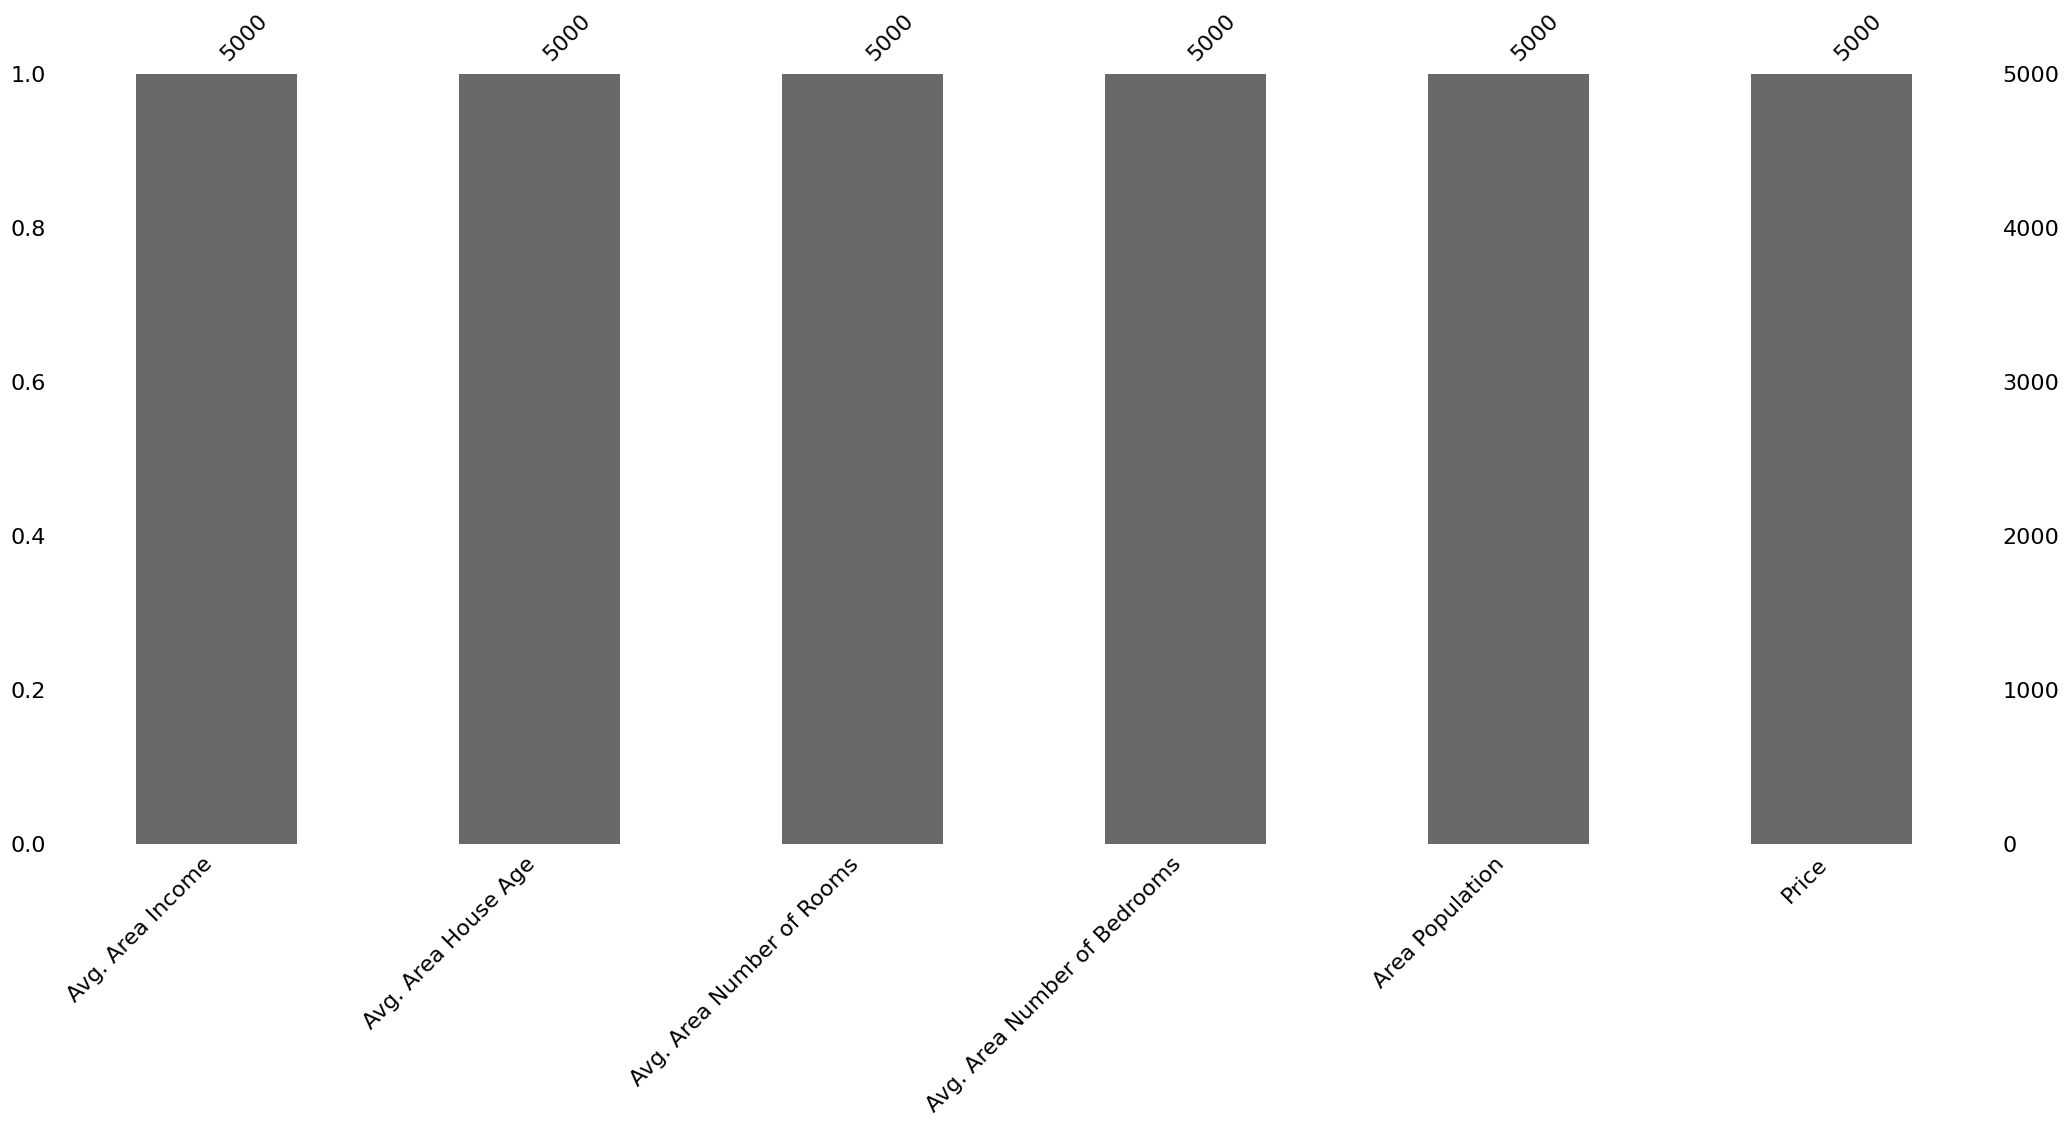

In [ ]:
ms.bar(df)

In [ ]:
import seaborn as sns

<Axes: >

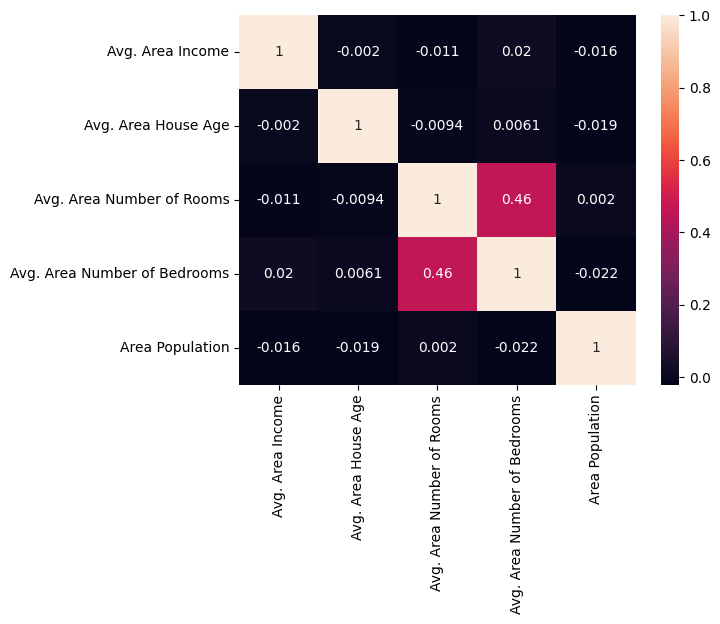

In [ ]:
sns.heatmap(df.iloc[:,0:5].corr(),annot=True)

In [ ]:
X=df.iloc[:,0:5]
Y=df.iloc[:,5]
Y=np.array(Y)
Y=Y.reshape(-1,1)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)

In [ ]:
beta=np.zeros(6)
number_of_iterations=1000
learning_rate=0.01
n = len(X_train) # Define n as the length of the training set

for i in range(number_of_iterations):
    x0_gradient=0
    x1_gradient=0
    x2_gradient=0
    x3_gradient=0
    x4_gradient=0
    x5_gradient=0
    for j in range(n): # Use n in the inner loop as well
        a=X_train[j,0]
        b=X_train[j,1]
        c=X_train[j,2]
        d=X_train[j,3]
        e=X_train[j,4]
        f=y_train[j]
        x0_gradient+=(beta[0]+(beta[1]*a)+(beta[2]*b)+(beta[3]*c)+(beta[4]*d)+(beta[5]*e)-f)
        x1_gradient+=((beta[0]+(beta[1]*a)+(beta[2]*b)+(beta[3]*c)+(beta[4]*d)+(beta[5]*e)-f)*a)
        x2_gradient+=((beta[0]+(beta[1]*a)+(beta[2]*b)+(beta[3]*c)+(beta[4]*d)+(beta[5]*e)-f)*b)
        x3_gradient+=((beta[0]+(beta[1]*a)+(beta[2]*b)+(beta[3]*c)+(beta[4]*d)+(beta[5]*e)-f)*c)
        x4_gradient+=((beta[0]+(beta[1]*a)+(beta[2]*b)+(beta[3]*c)+(beta[4]*d)+(beta[5]*e)-f)*d)
        x5_gradient+=((beta[0]+(beta[1]*a)+(beta[2]*b)+(beta[3]*c)+(beta[4]*d)+(beta[5]*e)-f)*e)
    beta[0]=beta[0]-learning_rate/n*x0_gradient
    beta[1]=beta[1]-learning_rate/n*x1_gradient
    beta[2]=beta[2]-learning_rate/n*x2_gradient
    beta[3]=beta[3]-learning_rate/n*x3_gradient
    beta[4]=beta[4]-learning_rate/n*x4_gradient
    beta[5]=beta[5]-learning_rate/n*x5_gradient
    print(beta)

<ipython-input-40-7ff210676558>:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  beta[0]=beta[0]-learning_rate/n*x0_gradient
<ipython-input-40-7ff210676558>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  beta[1]=beta[1]-learning_rate/n*x1_gradient
<ipython-input-40-7ff210676558>:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  beta[2]=beta[2]-learning_rate/n*x2_gradient
<ipython-input-40-7ff210676558>:29: DeprecationWarning: Conversion of an array with ndim > 

[12282.19149247  2329.56769072  1572.16911527  1176.18123127
   670.94875734  1295.11159262]
[24441.82249634  4635.34779858  3129.26806739  2337.89962246
  1328.96850673  2579.50369048]
[36480.11638797  6917.58545772  4671.44113202  3485.35607943
  1974.26276579  3853.26029888]
[48398.28432869  9176.52325163  6198.83120796  4618.7485848
  2607.03201925  5116.46482587]
[60197.52538684 11412.40123998  7711.57983021  5738.27224102
  3227.4737633   6369.20008569]
[71879.02665849 13625.45698517  9209.82718294  6844.11931285
  3835.7825495   7611.54830214]
[83443.96338704 15815.92557861 10693.7121123   7936.47926923
  4432.15002792  8843.59111199]
[94893.49908163 17984.03966671 12163.37213913  9015.53882451
  5016.76498969 10065.4095683 ]
[106228.78563425  20130.02947657  13618.9434715   10081.48197902
   5589.81340893  11277.08414387]
[117450.96343586  22254.12284146  15060.56101727  11134.49005914
   6151.47848409  12478.69473451]
[128561.16149118  24356.54522595  16488.35839633  12174.741

In [ ]:
X_test=np.insert(X_test,0,values=1,axis=1)
beta=np.array(beta).reshape(-1,1)
y_predict=X_test.dot(beta)

In [ ]:
error=y_test-y_predict
square_error=np.power(error,2)
sum_square_error=np.sum(square_error)
mean_square_error=sum_square_error/len(y_predict)
print(mean_square_error)

10070917109.152678


In [ ]:
rms_error=np.sqrt(mean_square_error)
print(rms_error)

100353.95911050384


In [ ]:
y_mean=np.mean(y_test)
total_variance=np.sum((y_test-y_mean)**2)
print(1-sum_square_error/total_variance)

0.9146607114050145
